# Fake Album Covers Game! Beginner's Guide to Web Scrapping with Python <br>
## The notebook follows the final assignment of [Python for Data Science](https://www.coursera.org/learn/python-for-applied-data-science) course offered by IBM.   

In [23]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
import requests
import time

#### Write a function that download a random image from [Lorem Picsum](https://picsum.photos/) and also writes text <br> on top and bottom of the image. This will be our base function. 

In [150]:
def display_cover(top, bottom):
    #import requests
    
    #name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    #album_art_raw = requests.get('https://picsum.photos/g/500/?random') # g is for grey images; I love grey
    # and save it as 'album_art_raw.png'
    #with open(name,'wb') as album_art_raw_file:
    #   album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("al_art_raw_1st.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
    band_name_font = ImageFont.truetype("/usr/share/fonts/truetype/ebgaramond/EBGaramond08-Italic.ttf", 26)
    album_name_font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSansOblique.ttf", 33) 

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 93, 220
    album_x, album_y = 48, 75

    outline_color ="black"
    outline_color1 = "pink"
    outline_color2 = "slategray"
    outline_color3 = "deeppink"
    
    outline_color4 = "orange"
    outline_color5 = "coral"
    outline_color6 = "orangered"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color6)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color5)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color4)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color3)
    draw.text((album_x+1, album_y-4), bottom , font=album_name_font, fill=outline_color2)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color1)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(245,245,220),font=band_name_font)
    draw.text((album_x, album_y),bottom,(230,250,250),font=album_name_font)

    return img

#### Check Box for Understanding the Requests Library's Primitive Operations 

Here I have used this before the function above to save the image. This way we can 
work on a fix image otherwise in an ideal case, the operations performed in the cell below 
should be done in the _display_cover()_ function itself. 


In [7]:
#al_art_raw1 = requests.get('https://picsum.photos/g/500/?random')
#name1='al_art_raw.png'

#print type(al_art_raw.content) # type string


#with open(name1,'wb') as album_art_raw_file1: # 'wb' write binary, binary is necessary because it is a png file
       #album_art_raw_file1.write(al_art_raw1.content)
#print (type(al_art_raw1))   

In [2]:
#img = Image.open("al_art_raw_2nd.png")
#draw = ImageDraw.Draw(img)

#### Use Requests to Scrap from Random Wiki Page

In [ ]:
# Create a request object for random wikipage 
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

raw_random_wiki_page1 = requests.get(wikipedia_link)
print type(raw_random_wiki_page1)

#### Check the encoding type 

In [11]:
wiki_page = raw_random_wiki_page1.text
print type(wiki_page)
print "encoding type", raw_random_wiki_page1.encoding

<type 'unicode'>
encoding type UTF-8


#### Check the content of the page 

In [24]:
#raw_random_wiki_page1.content # Menyamya District
#print (wiki_page)

#### Find the XML nodes and extract the title 

In [58]:
wiki_page = wiki_page.encode("ascii", errors='ignore')
print type(wiki_page)

xml_e = wiki_page.find('</title>')
xml_b = wiki_page.find('<title>')
title_b_len = len('</title>')
total_len = xml_e + title_b_len

title_wiki = wiki_page[xml_b:total_len]
print "title including wiki: ", title_wiki 

<type 'str'>
title including wiki:  <title>Menyamya District - Wikipedia</title>


#### Get rid-off the Unncesarry Terms 

In [59]:
#strip "- Wikipedia" from the title 
list_to_strip = ["<title>", "- Wikipedia", "</title>"]
for l in list_to_strip:
    title_only = title_wiki.replace(l, "")
    title_wiki = title_only    
print "title without wikipedia: ", title_only
band_title = title_only

#first_title = title_wiki
#print first_title

title without wikipedia:  Menyamya District 


#### Now for the album title we will use random wikiquote page

Follow the same  procedure as above

In [115]:
quote_link = 'https://en.wikiquote.org/wiki/Special:Random'
quote_page = requests.get(quote_link)
print type(quote_page)

<class 'requests.models.Response'>


In [116]:
quote_page_text = quote_page.text
print "quote page text type: ", type(quote_page_text)
print "encoding type: ", quote_page.encoding

quote page text type:  <type 'unicode'>
encoding type:  UTF-8


In [118]:
#quote_page.content
#print (quote_page_text)
# the randomly generated quote page structure is all over the place 

In [119]:
xml_q_e = quote_page_text.find('</title>')
xml_q_b = quote_page_text.find('<title>')
quote_b_len = len('</title>')
quote_total_len = xml_q_e + quote_b_len

quote_wiki = quote_page_text[xml_q_b:quote_total_len]
print "title including wiki: ", quote_wiki 

title including wiki:  <title>Public policy - Wikiquote</title>


In [123]:
#strip "- Wikipedia" from the title 
list_to_strip1 = ["<title>", "- Wikiquote", "</title>"]
for l in list_to_strip1:
    quote_title_only = quote_wiki.replace(l, "")
    quote_wiki = quote_title_only    
print "title without wikipedia: ", quote_title_only
album_title = quote_title_only.upper()

#first_title = title_wiki
#print first_title

title without wikipedia:  Public policy 


In [151]:
fake_image = display_cover(top=band_title, bottom=album_title)
fake_image.save('fakeCover3.png')

### Display the _Fake Cover_ 

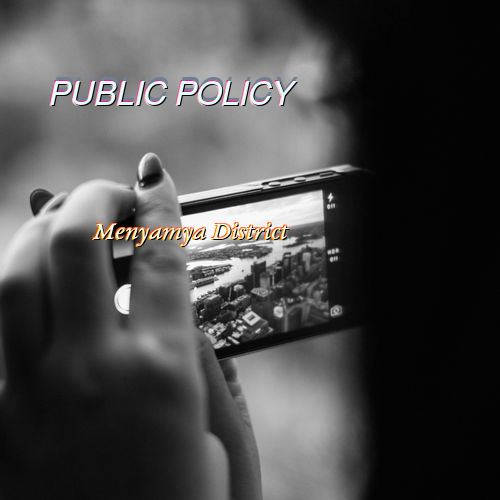

In [152]:
IPythonImage(filename='fakeCover3.png')

#### Done !